In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

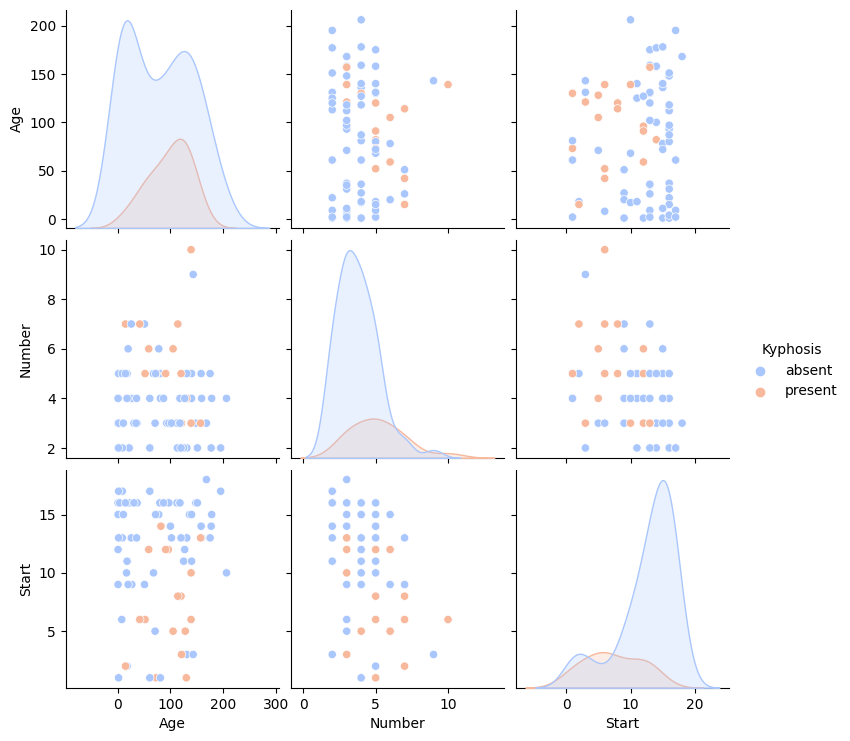

In [11]:
sns.pairplot(df,hue='Kyphosis',palette='coolwarm')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['kyphosis'] = le.fit_transform(df['Kyphosis'])d

In [15]:
df.head()

,Kyphosis,Age,Number,Start,kyphosis
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [16]:
df.drop(columns='Kyphosis',axis=1,inplace =True)

In [17]:
df.head()

,Age,Number,Start,kyphosis
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


In [18]:
X=df[['Age','Number','Start']]
Y =df['kyphosis']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.3)

In [21]:
from sklearn import tree

In [22]:
tr = tree.DecisionTreeClassifier()

In [23]:
tr.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
prediction = tr.predict(X_test)

In [31]:
tr.score(X_train,Y_train)

1.0

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[36 11]
 [ 6  4]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        47
           1       0.27      0.40      0.32        10

    accuracy                           0.70        57
   macro avg       0.56      0.58      0.56        57
weighted avg       0.75      0.70      0.72        57



In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(Y_test,prediction))

0.7017543859649122


# random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=100)

In [36]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(Y_test,pred))

[[41  6]
 [ 7  3]]


In [41]:
(41+3)/(41+6+3+7)

0.7719298245614035

In [38]:
print(accuracy_score(Y_test,pred))

0.7719298245614035
